In [23]:
import pyscf
from pyscf import tools, symm
import numpy as np

In [13]:

molecule = """
N   0.0 0.0 0.0
N   2.0 0.0 0.0
"""


cas_norb = 34
cas_nel =34
focc = 93

basis = "cc-pvtz"
#

mol = pyscf.gto.Mole(atom=molecule,
    symmetry = True,
    spin   = 0,
    charge = 0,
    basis = basis)


mol.build()

print("symmetry: ",mol.topgroup)
mf = pyscf.scf.RHF(mol)
mf.verbose = 4
mf.conv_tol = 1e-8
mf.conv_tol_grad = 1e-5
mf.init_guess = "sad"
mf.run(max_cycle=200)

print(" Hartree-Fock Energy: %12.8f" % mf.e_tot)


symmetry:  Dooh


******** <class 'pyscf.scf.hf_symm.SymAdaptedRHF'> ********
method = SymAdaptedRHF-RHF
initial guess = sad
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-05
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /var/folders/w4/q6n49yl10v1fxv8jnns_cmp40000gn/T/tmp1xr2qkmf
max_memory 4000 MB (current use 0 MB)
init E= -107.67673318338
HOMO (E1uy) = -0.213036145190876  LUMO (E1gx) = -0.118212329290876
cycle= 1 E= -108.328975817741  delta_E= -0.652  |g|= 0.348  |ddm|=  1.2
HOMO (E1ux) = -0.458674672154443  LUMO (E1gy) = -0.147548474942932
cycle= 2 E= -108.354912280813  delta_E= -0.0259  |g|= 0.103  |ddm|= 0.305
HOMO (E1ux) = -0.409874221051099  LUMO (E1gy) = -0.0940299468241894
cycle= 3 E= -108.357302480392  delta_E= -0.00239  |g|= 0.0196  |ddm|= 0.0552
HOMO (E1ux) = -0.409684421365849  LUMO (E1gy) = -0.0926640103211921
cycl

In [42]:

norb = mf.mo_coeff.shape[0]
pyscf.tools.molden.from_mo(mol, "C_RHF.molden", mf.mo_coeff)
for s,i,c in zip(mol.irrep_name, mol.irrep_id, mol.symm_orb):
    print(" %5s %3i %4i"%(s, i, c.shape[1]))

def myocc(mf):
    mol = mf.mol
    irrep_id = mol.irrep_id
    so = mol.symm_orb
    orbsym = symm.label_orb_symm(mol, irrep_id, so, mf.mo_coeff)
    occsym = np.array(orbsym)[mf.mo_occ==2]
    virsym = np.array(orbsym)[mf.mo_occ==0]
    for ir,irname in enumerate(mol.irrep_name):
        print('%5s, Occ = %5d, Vir = %d' % (irname, sum(occsym==ir), sum(virsym==ir)))

myocc(mf)


   A1g   0   10
  E1gx   2    6
  E1gy   3    6
   A1u   5   10
  E1uy   6    6
  E1ux   7    6
  E2gx  10    3
  E2gy  11    3
  E3gx  12    1
  E3gy  13    1
  E2uy  14    3
  E2ux  15    3
  E3uy  16    1
  E3ux  17    1
  A1g, Occ =     3, Vir = 7
 E1gx, Occ =     0, Vir = 0
 E1gy, Occ =     0, Vir = 6
  A1u, Occ =     0, Vir = 6
 E1uy, Occ =     0, Vir = 0
 E1ux, Occ =     2, Vir = 8
 E2gx, Occ =     1, Vir = 5
 E2gy, Occ =     1, Vir = 5
 E3gx, Occ =     0, Vir = 0
 E3gy, Occ =     0, Vir = 0
 E2uy, Occ =     0, Vir = 3
 E2ux, Occ =     0, Vir = 3
 E3uy, Occ =     0, Vir = 1
 E3ux, Occ =     0, Vir = 1


In [50]:
# print(mol.irrep_name[mf.orbsym])
for sidx,s in enumerate(mol.irrep_id):
    # print(" Orb: %5i %5s" %(sidx, s))    
    print(" Orb: %5i %5i %5s" %(sidx, s, mol.irrep_name[s]))

 Orb:     0     0   A1g
 Orb:     1     2  E1gy
 Orb:     2     3   A1u
 Orb:     3     5  E1ux
 Orb:     4     6  E2gx
 Orb:     5     7  E2gy
 Orb:     6    10  E2uy
 Orb:     7    11  E2ux
 Orb:     8    12  E3uy
 Orb:     9    13  E3ux


IndexError: list index out of range

In [52]:
pyscf.scf.hf_symm.analyze(mf)

**** SCF Summaries ****
Total Energy =                        -108.357518741411880
Nuclear Repulsion Energy =              12.964841667540002
One-electron Energy =                 -172.559523712385612
Two-electron Energy =                   51.237163303433725
Wave-function symmetry = Dooh
occupancy for each irrep:    A1g E1gx E1gy  A1u E1uy E1ux E2gx E2gy E3gx E3gy E2uy E2ux E3uy E3ux
                               3    0    0    2    1    1    0    0    0    0    0    0    0    0
**** MO energy ****
MO #1 (A1g #1), energy= -15.8274321718833 occ= 2
MO #2 (A1u #1), energy= -15.8271416368937 occ= 2
MO #3 (A1g #2), energy= -1.10438349265382 occ= 2
MO #4 (A1u #2), energy= -0.974783828382258 occ= 2
MO #5 (A1g #3), energy= -0.488182132232762 occ= 2
MO #6 (E1uy #1), energy= -0.410339211636373 occ= 2
MO #7 (E1ux #1), energy= -0.410339211636369 occ= 2
MO #8 (E1gx #1), energy= -0.0933581550076773 occ= 0
MO #9 (E1gy #1), energy= -0.0933581550076825 occ= 0
MO #10 (A1u #3), energy= 0.02585088245136

((array([1.99999401e+00, 1.95483606e+00, 9.66696475e-04, 3.15288541e-05,
         1.03986022e+00, 9.85108347e-01, 9.85108347e-01, 2.57203718e-03,
         1.29678002e-02, 1.29678002e-02, 5.25489523e-05, 3.13092040e-04,
         3.13092040e-04, 1.38262515e-03, 6.98000988e-34, 3.95938997e-04,
         1.38262515e-03, 1.18781699e-03, 2.00255534e-04, 5.26682981e-34,
         1.83278868e-05, 2.00255534e-04, 5.49836603e-05, 2.61374661e-05,
         9.46434742e-34, 1.74249774e-06, 1.04549864e-05, 1.11855003e-05,
         1.74249774e-05, 1.86425005e-05, 1.99999401e+00, 1.95483606e+00,
         9.66696475e-04, 3.15288541e-05, 1.03986022e+00, 9.85108347e-01,
         9.85108347e-01, 2.57203718e-03, 1.29678002e-02, 1.29678002e-02,
         5.25489523e-05, 3.13092040e-04, 3.13092040e-04, 1.38262515e-03,
         3.59255895e-34, 3.95938997e-04, 1.38262515e-03, 1.18781699e-03,
         2.00255534e-04, 5.72386899e-34, 1.83278868e-05, 2.00255534e-04,
         5.49836603e-05, 2.61374661e-05, 5.87636678

In [7]:
import numpy as np
import scipy as sp
import matplotlib as mpl
from matplotlib import pyplot as plt


Ca = mf.mo_coeff[0]
Cb = mf.mo_coeff[1]
S = mf.get_ovlp()
na1 = mf.nelec[0]
nb1 = mf.nelec[1]
print(mf.nelec)

Ca_doc = Ca[:,0:na1]
Cb_doc = Cb[:,0:nb1]
Pa = Ca_doc @ Ca_doc.T
Pb = Cb_doc @ Cb_doc.T

P = Pa + Pb

sqrtS = sp.linalg.sqrtm(S)
P = sqrtS @ P @ sqrtS
P = (P + P.T) * .5
# F = sp.linalg.eig(P);
P_evals, P_evecs = sp.linalg.eigh(P)

print(mf2.spin_square((Ca_doc,Cb_doc),S))
act_list = []
doc_list = []

thresh = .002275
thresh = .001
for idx,n in enumerate(P_evals):
#     @printf(" %4i = %12.8f\n",idx,n)
    if n < 2.0 - thresh:
        if n > thresh:
            act_list.append(idx)
    else:
        doc_list.append(idx)
        
        
print(" Number of active orbitals: ", len(act_list))
print(" Number of doc    orbitals: ", len(doc_list))

invsqrtS = sp.linalg.inv(sqrtS)

Cact = invsqrtS @ P_evecs[:,act_list]
Cdoc = invsqrtS @ P_evecs[:,doc_list]


pyscf.tools.molden.from_mo(pymol, "C_act.molden", Cact)
pyscf.tools.molden.from_mo(pymol, "C_doc.molden", Cdoc)

# import matplotlib as mpl

plt.plot(sorted(P_evals)[420:470], marker="o")

ModuleNotFoundError: No module named 'matplotlib'

In [25]:
Cact_loc = pyscf.lo.PM(pymol).kernel(Cact, verbose=4);
pyscf.tools.molden.from_mo(pymol, "C_act_loc.molden", Cact_loc)


Set conv_tol_grad to 0.000316228
macro= 1  f(x)= 8.7208084872751  delta_f= 8.72081  |g|= 1.072  4 KF 20 Hx
macro= 2  f(x)= 10.129333609996  delta_f= 1.40853  |g|= 1.03495  4 KF 20 Hx
macro= 3  f(x)= 13.378266688344  delta_f= 3.24893  |g|= 1.17898  4 KF 20 Hx
macro= 4  f(x)= 16.041313322225  delta_f= 2.66305  |g|= 1.47616  4 KF 20 Hx
macro= 5  f(x)= 21.385653152038  delta_f= 5.34434  |g|= 1.38953  4 KF 20 Hx
macro= 6  f(x)= 24.180475441185  delta_f= 2.79482  |g|= 1.58169  4 KF 20 Hx
macro= 7  f(x)= 28.444991335577  delta_f= 4.26452  |g|= 1.61867  4 KF 20 Hx
macro= 8  f(x)= 31.491431502928  delta_f= 3.04644  |g|= 1.35764  4 KF 20 Hx
macro= 9  f(x)= 31.919368277206  delta_f= 0.427937  |g|= 1.21479  2 KF 5 Hx
macro= 10  f(x)= 31.929072305408  delta_f= 0.00970403  |g|= 0.00110277  5 KF 29 Hx
macro= 11  f(x)= 31.929076228311  delta_f= 3.9229e-06  |g|= 9.98387e-05  3 KF 15 Hx
macro= 12  f(x)= 31.929076697654  delta_f= 4.69343e-07  |g|= 8.23865e-05  1 KF 2 Hx
macro X = 12  f(x)= 31.92907669765


WARN: orbitals [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33] not symmetrized, norm = [0.50000006 0.50000006 0.50000007 0.5        0.5        0.5
 0.5        0.5        0.50000001 0.5000001  0.50000002 0.5000001
 0.56304674 0.58290406 0.85263962 0.50000002 0.50000003 0.50000003
 0.50000007 0.50000005 0.50000003 0.50000003 0.50000005 0.50000007
 0.50000007 0.50000003 0.50000002 0.5        0.50000002 0.50000001
 0.50000003]

33.99999999999982
34

H 0.32211870756198474 -2.8246882419936847 -2.084857022803321
H -0.3220415962859061 2.8247624035240704 -2.0847631308047667
H -2.824695797966132 -0.3221108038085287 2.084847572158399
H -2.5032951216472408 4.4510717140312375 -1.8767465951986797
H -0.00010004109813602745 -8.596105252141242e-05 -4.5647302086140504e-05
H 7.110145400037488 1.1869126886168917 5.580997499908256
H -1.1869126894854087 7.110145398171839 -5.58099750063676
H -7.110145396948761 -1.1869126914004002 5.580997503124816
H 1.18691269

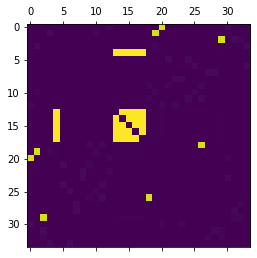

In [96]:
# # clustering from average positions
# print(np.trace(Cact_loc.T @ S @ Cact_loc))
# r1 = pymol.intor_symmetric("int1e_r");
# r2 = pymol.intor_symmetric("int1e_r2");

# rx = (Cact_loc.T @ r1[0,:,:] @ Cact_loc).diagonal();
# ry = (Cact_loc.T @ r1[1,:,:] @ Cact_loc).diagonal();
# rz = (Cact_loc.T @ r1[2,:,:] @ Cact_loc).diagonal();
# n_act = Cact_loc.shape[1]
# positions = np.zeros((n_act,3))
# positions[:,0] = rx
# positions[:,1] = ry
# positions[:,2] = rz
# xyz_str = "{n_act}\n\n".format(n_act = n_act)
# for i in range(n_act):
#     xyz_str += "H {x} {y} {z}\n".format(x=positions[i,0], y=positions[i,1], z=positions[i,2])
    
# print(xyz_str)

# metric = np.zeros((n_act, n_act))

# for i in range(n_act):
#     for j in range(i+1,n_act):
#         pi = positions[i,:]
#         pj = positions[j,:]
#         # vari = r2[i,i] - r1[i,i]*r1[i,i]
#         # varj = r2[j,j] - position]*r1[i,i]
#         dist = np.sqrt((pi[0]-pj[0])**2 + (pi[1]-pj[1])**2 + (pi[2]-pj[2])**2 )
#         metric[i,j] = np.exp(-.5* dist**2)
#         # metric[i,j] = np.exp(-(r2[i,i] + r2[j,j]) * dist)
#         metric[j,i] = metric[i,j]
#         if metric[i,j] > .01:
#             print(" %2i %2i %12.8f" %(i, j, metric[i,j]))
        
# plt.matshow(metric);

# Now build JK

In [113]:
h0 = pyscf.gto.mole.energy_nuc(pymol)
h  = pyscf.scf.hf.get_hcore(pymol)
j, k = pyscf.scf.hf.get_jk(pymol, Pa+Pb, hermi=1)

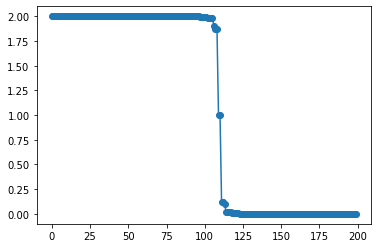

In [114]:
import matplotlib as mpl
from matplotlib import pyplot as plt

plt.plot(sorted(P_evals)[::-1][0:200], marker='o')

# Graph Clustering

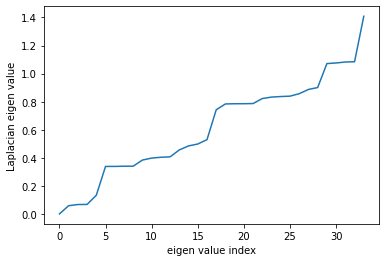

In [115]:
import copy as cp

nvecs = 5

operator = h + j - .5*k

C = cp.deepcopy(Cact_loc)
k1 = C.T @ operator @ C
# k1 = metric
A = abs(k1)
L = -1*A
for i in range(A.shape[0]):
    L[i,i] += np.sum(A[i,:])
    
L_evals, L_evecs = sp.linalg.eigh(L)
# print(L_evals)
plt.plot(L_evals,);
plt.xlabel("eigen value index");
plt.ylabel("Laplacian eigen value");

# L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
# F = eigen(L);


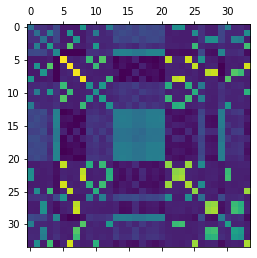

In [116]:
# projection onto the lowest `nvecs` fiedler vectors

L_evecs_ss = L_evecs[:,0:nvecs]
graph = L_evecs_ss @ L_evecs_ss.T
plt.matshow(graph);

In [117]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(graph)
# kmeans.labels_array([1, 1, 1, 0, 0, 0], dtype=int32)

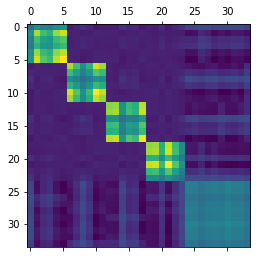

In [118]:
kmeans.labels_
sorted_list = np.argsort(kmeans.labels_)
plt.matshow(graph[sorted_list, :][:, sorted_list]);

In [119]:
C_sorted = Cact_loc[:,sorted_list]
pyscf.tools.molden.from_mo(pymol, "C_act_loc_sorted.molden", C_sorted)


WARN: orbitals [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27 28 29 31 32] not symmetrized, norm = [0.50000006 0.50000003 0.5        0.5000001  0.50000005 0.5
 0.50000003 0.50000002 0.50000007 0.50000001 0.5        0.50000007
 0.50000007 0.50000003 0.50000007 0.50000002 0.50000001 0.5
 0.50000005 0.50000003 0.5000001  0.5        0.5        0.50000006
 0.50000003 0.50000002 0.85263962 0.58290406 0.56304674 0.50000002
 0.50000003]



In [120]:
# Now let's break up that first large cluster on the metal

m = C_sorted[:,24:34].T @ operator @ C_sorted[:,24:34]
m_evals, m_evecs = sp.linalg.eigh(m)

m_evecs = m_evecs[:, [0,9,1,2,3,4,5,6,7,8]] # put 4s sig,sig* first
C_sorted_2 = cp.deepcopy(C_sorted)
C_sorted_2[:,24:34] = C_sorted[:,24:34] @ m_evecs
pyscf.tools.molden.from_mo(pymol, "C_act_loc_sorted_2.molden", C_sorted_2)

# sorted_list_2 = [*range(34)]
# sorted_list_2[4] = -1
# sorted_list_2[5] = -2


# sorted_list_2 = np.argsort(sorted_list_2)

# C_sorted_3 = C_sorted_2[:, sorted_list_2]
# pyscf.tools.molden.from_mo(pymol, "C_act_loc_sorted_3.molden", C_sorted_3)

clusters = [
            [*range(0,6)],
            [*range(6,12)],
            [*range(12,18)],
            [*range(18,24)],
            [*range(24,32)],
            [*range(32,34)]
           ]
init_fspace = [
    (3,3),
    (3,3),
    (3,3),
    (3,3),
    (1,1),
    (4,4)
];



WARN: orbitals [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] not symmetrized, norm = [0.50000006 0.50000003 0.5        0.5000001  0.50000005 0.5
 0.50000003 0.50000002 0.50000007 0.50000001 0.5        0.50000007
 0.50000007 0.50000003 0.50000007 0.50000002 0.50000001 0.5
 0.50000005 0.50000003 0.5000001  0.5        0.5        0.50000006]



In [121]:
print(clusters)
print(init_fspace)

[[0, 1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11], [12, 13, 14, 15, 16, 17], [18, 19, 20, 21, 22, 23], [24, 25, 26, 27, 28, 29, 30, 31], [32, 33]]
[(3, 3), (3, 3), (3, 3), (3, 3), (1, 1), (4, 4)]


# Make Integrals

In [122]:
d1_embed = 2 * Cdoc @ Cdoc.T

h0 = pyscf.gto.mole.energy_nuc(pymol)
h  = pyscf.scf.hf.get_hcore(pymol)
j, k = pyscf.scf.hf.get_jk(pymol, d1_embed, hermi=1)

In [123]:
h0 += np.trace(d1_embed @ ( h + .5*j - .25*k))

h = C_sorted_2.T @ h @ C_sorted_2
j = C_sorted_2.T @ j @ C_sorted_2;
k = C_sorted_2.T @ k @ C_sorted_2;

In [124]:
nact = h.shape[0]

h2 = pyscf.ao2mo.kernel(pymol, C_sorted_2, aosym="s4", compact=False)
h2.shape = (nact, nact, nact, nact)

In [125]:
# The use of d1_embed only really makes sense if it has zero electrons in the
# active space. Let's warn the user if that's not true

S = pymol.intor("int1e_ovlp_sph")
n_act = np.trace(S @ d1_embed @ S @ C_sorted_2 @ C_sorted_2.T)
if abs(n_act) > 1e-8 == False:
    print(n_act)
    error(" I found embedded electrons in the active space?!")

h1 = h + j - .5*k;


In [126]:
np.save("clustered1_integrals_h0", h0)
np.save("clustered1_integrals_h1", h1)
np.save("clustered1_integrals_h2", h2)
np.save("clustered1_mo_coeffs", C_sorted_2)
np.save("clustered1_overlap_mat", S)